# Task 1b

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your spam dataset (replace 'file_path' with the correct path to your dataset)
file_path = '/Users/ananyasmaranikadivendi/Downloads/spam.xlsx'
spam_data = pd.read_excel(file_path)

# Clean the dataset and prepare it for modeling
cleaned_spam_data = spam_data.iloc[5:].reset_index(drop=True)
cleaned_spam_data.columns = cleaned_spam_data.iloc[0]
cleaned_spam_data = cleaned_spam_data.drop(0).reset_index(drop=True)

# Keep only keyword columns and the 'Category' column
spam_model_data = cleaned_spam_data.iloc[:, [6, 7, 8, 9, 10, 11]].copy()

# Rename columns for clarity
spam_model_data.columns = ['win', 'click', 'team', 'claim', 'reminder', 'Category']

# Drop rows with missing values and encode 'Spam' as 1 and 'Ham' as 0
spam_model_data.dropna(inplace=True)
spam_model_data['Category'] = spam_model_data['Category'].map({'Spam': 1, 'Ham': 0})

# Split the dataset into features (X) and target label (y)
X = spam_model_data[['win', 'click', 'team', 'claim', 'reminder']]
y = spam_model_data['Category']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Naive Bayes Classifier (Multinomial)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Standardize features before KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate both models
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Generate classification reports
nb_report = classification_report(y_test, nb_predictions)
knn_report = classification_report(y_test, knn_predictions)

# Print results
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print("\nNaive Bayes Classification Report:")
print(nb_report)
print("\nKNN Classification Report:")
print(knn_report)


Naive Bayes Accuracy: 0.8
KNN Accuracy: 1.0

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Task 2b

# Fitting the model to decision trees so the max depth is set to 5 to prevent overfitting

Decision Tree Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



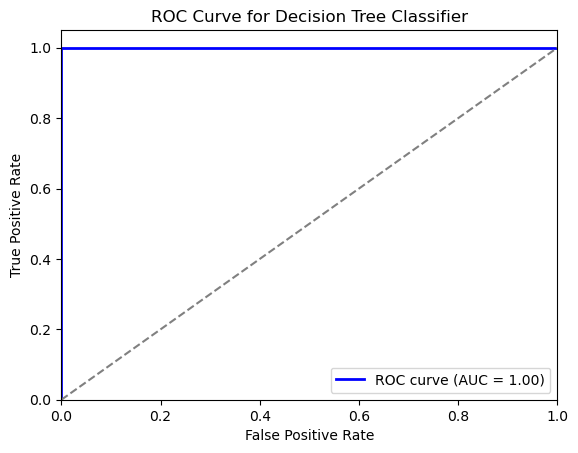

AUC Score: 1.00


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your spam dataset (replace 'file_path' with the correct path to your dataset)
file_path = '/Users/ananyasmaranikadivendi/Downloads/spam.xlsx'  # Replace with the correct path to your file
spam_data = pd.read_excel(file_path)

# Clean the dataset and prepare it for modeling
cleaned_spam_data = spam_data.iloc[5:].reset_index(drop=True)
cleaned_spam_data.columns = cleaned_spam_data.iloc[0]
cleaned_spam_data = cleaned_spam_data.drop(0).reset_index(drop=True)

# Keep only keyword columns and the 'Category' column
spam_model_data = cleaned_spam_data.iloc[:, [6, 7, 8, 9, 10, 11]].copy()

# Rename columns for clarity
spam_model_data.columns = ['win', 'click', 'team', 'claim', 'reminder', 'Category']

# Drop rows with missing values and encode 'Spam' as 1 and 'Ham' as 0
spam_model_data.dropna(inplace=True)
spam_model_data['Category'] = spam_model_data['Category'].map({'Spam': 1, 'Ham': 0})

# Split the dataset into features (X) and target label (y)
X = spam_model_data[['win', 'click', 'team', 'claim', 'reminder']]
y = spam_model_data['Category']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Decision Tree classifier with limited depth
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
y_pred = dt_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")
